# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Nur Aria Hibnastiar
- **Email:** nurhibnastiar1@gmail.com
- **Email Cohort:** mc401d5y0574@student.devacademy.id
- **ID Dicoding:** aria2727

## Informasi Dataset

Relasi Dataset

![Gambar dataset Relasi](data/data_relations.png)

Penjelasan setiap dataset

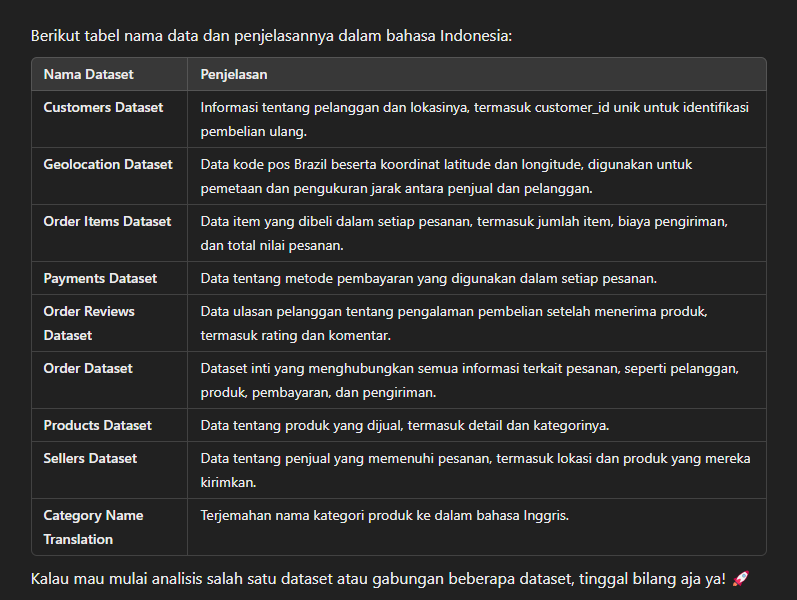

## Menentukan Pertanyaan Bisnis

1. Apakah jarak antara penjual & pelanggan serta waktu pengiriman mempengaruhi rating?
2. Metode pembayaran apa yang sering di gunakan di setiap wilayah, dan berapa persentase tertinggi di setiap wilayah?
3. Apakah metode pembayaran tertentu berkaitan dengan nilai transaksi di wilayah tersebut?
4. Wialayah mana dengan rata rata nilai transaksi & rating produk yang tertinggi, apakah ada korelasi antar keduanya?
5. Produk apa saja yang sering dibeli bersama dalam satu pesanan?
6. Kaetegori produk mana yang paling sering dibeli bersamaan?

## Import Package/Library

In [65]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [3]:
df_customers = pd.read_csv("data/customers_dataset.csv")
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_geolocation = pd.read_csv("data/geolocation_dataset.csv")
df_geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
df_order_items = pd.read_csv("data/order_items_dataset.csv")
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_order_payments = pd.read_csv("data/order_payments_dataset.csv")
df_order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
df_order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
df_orders = pd.read_csv("data/orders_dataset.csv")
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_product_category = pd.read_csv("data/product_category_name_translation.csv")
df_product_category.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
df_products = pd.read_csv("data/products_dataset.csv")
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
df_sellers = pd.read_csv("data/sellers_dataset.csv")
df_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Terdapat 9 data yang di load, yaitu
- df_customers
- df_geolocation
- df_order_items
- df_order_payments
- df_order_reviews
- df_orders
- df_product_category
- df_products
- df_sellers

### Assessing Data

#### `df_customers`

##### Cek Tipe Data & data null

In [12]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


terdapat tipe data yang kurang sesuai yaitu terletak pada `customer_zip_code_prefix` dikarenakan kolom tersebut digunakan untuk identifier. kolom tersebut dapat diubah menjadi tipe data string. dan tidak ada data yang null

##### Cek Duplikat Data

In [13]:
df_customers.duplicated().sum()

np.int64(0)

pada dataset `df_customers` tidak terdapat data yg duplikat

##### Cek Unik Data

In [14]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [15]:
# cek selisih dari customer_id & customer_unique_id
df_customers['customer_id'].nunique() - df_customers['customer_unique_id'].nunique()

3345

- Pada kolom `customer_id` dan `customer_unique_id` terdapat selisih 3345 yang menandakan ada beberapa customer yang melakukan transaksi lebih dari sekali

In [16]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


insight
- 1
- 2

#### `df_geolocation`

##### Cek tipe data & data null

In [17]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- tidak ada data yang null pada dataset tersebut.
- tipe data pada kolom `geolocation_zip_code_prefix` bisa di ubah menjadi string dikarenakan data tersebut merupakan identifier

##### Cek Unik Data

In [20]:
df_geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

Terdapat titik latitude & longtitude yang memiliki perbedaan / selisih. kemungkinan besarnya terjadi karena datanya terduplikasi

##### Cek duplikat data

In [39]:
duplikat_baris_geolocation = df_geolocation.duplicated().sum()
total_baris_geolocation = len(df_geolocation)
print("jumlah duplikasi : ", duplikat_baris_geolocation)
print("total baris data :", total_baris_geolocation)

jumlah duplikasi :  261831
total baris data : 1000163


In [ ]:

persentase_duplikat_geolocation = duplikat_baris_geolocation / total_baris_geolocation * 100
print(f'Persentase df_geolocation duplikat : {persentase_duplikat_geolocation:.2f}%')

Persentase df_geolocation duplikat : 26.18%


Terdapat 26.18% data yang terduplikasi dari 1000163 pada dataset `df_geolocation`. pada tahap cleaning akan dibersihkan semua

##### Cek Outliers

In [ ]:
# outliers latitude
q1_lat = df_geolocation['geolocation_lat'].quantile(.25) # 0.25 disingkat dengan .25
q3_lat = df_geolocation['geolocation_lat'].quantile(.75)
iqr_lat = q1_lat-q3_lat

lower_bound = q1_lat - 1.5 * iqr_lat
upper_bound = q3_lat + 1.5 * iqr_lat

outliers_df_geolocation = df_geolocation[
  (df_geolocation['geolocation_lat'] < lower_bound) |
  (df_geolocation['geolocation_lat'] > upper_bound)
]

print(len(outliers_df_geolocation))

1000163


In [81]:
# outliers longtitude
q1_lng = df_geolocation['geolocation_lng'].quantile(.25)
q3_lng = df_geolocation['geolocation_lng'].quantile(.75)
iqr_lng = q3_lng - q1_lng

lower_bound_lng = q1_lng - 1.5 * iqr_lng
upper_bound_lng = q3_lng + 1.5 * iqr_lng

outliers_lng = df_geolocation[
    (df_geolocation['geolocation_lng'] < lower_bound_lng) |
    (df_geolocation['geolocation_lng'] > upper_bound_lng)
]

print(len(outliers_lng))

42348


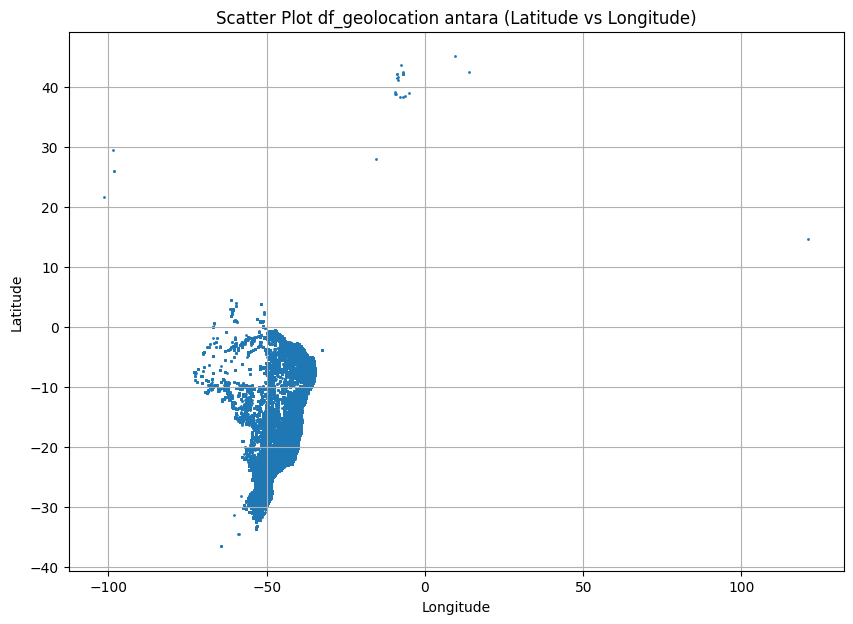

In [71]:

plt.figure(figsize=(10, 7))
plt.scatter(df_geolocation['geolocation_lng'], df_geolocation['geolocation_lat'], alpha=1, s=1)
plt.title('Scatter Plot df_geolocation antara (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Dilihat dari **angka outliers** dan **scatter plot** terdapat titik yang berada **diluar dari area brazil**. kita akan **hilangkan outliers** pada tahap cleaning nanti untuk memastikan bahwa konteks dari analisis kali ini adalah hanya area brazil

#### `df_order_items`

##### Cek tipe data & data null

In [73]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [72]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- tidak ada data yang null
- pada `shipping_limit_date` tipe data seharusnya adalah datetime. nanti akan di ubah pada tahap cleaning

##### Cek Duplikasi Data

In [76]:
df_order_items.duplicated().sum()

np.int64(0)

pada `df_order_items` tidak ada data duplikat sama sekali

##### Cek unik data

In [75]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

dilihat dari data tersebut terdapat 
- 98666 total pemesanan
- max jumlah produk yang di beli orang dalam 1 kali pemesanan adalah 21
- terdapat 93318 batas waktu pengiriman ke kurir berarti ada yang memiliki batas waktu yang sama
- untuk `price` dan `freight_value` bisa di lakukan pengecekan quartile untuk memastikan tidak ada outliers

##### Cek Outliers

In [87]:
df_order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [83]:
# outliers price
q1_harga = df_order_items['price'].quantile(.25)
q3_harga = df_order_items['price'].quantile(.75)
iqr_harga = q3_harga - q1_harga

lower_bound_harga = q1_harga - 1.5 * iqr_harga
upper_bound_harga = q3_harga + 1.5 * iqr_harga

outliers_harga = df_order_items[
    (df_order_items['price'] < lower_bound_harga) |
    (df_order_items['price'] > upper_bound_harga)
]

print(len(outliers_harga))

8427


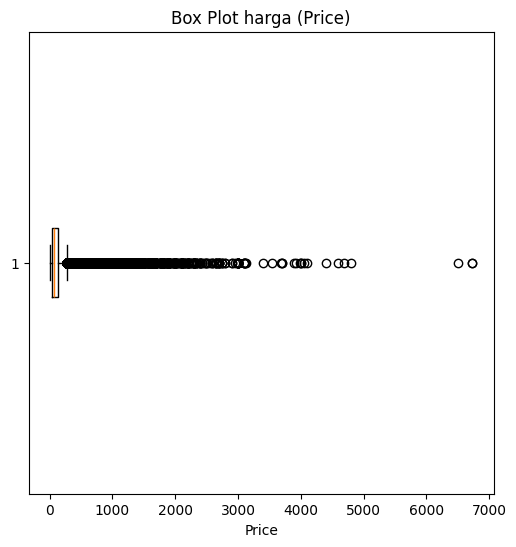

In [93]:
# visualisasi outliers dari harga (price)
plt.figure(figsize=(6,6))
plt.boxplot(df_order_items['price'], vert=False)
plt.title('Box Plot harga (Price)')
plt.xlabel('Price')
plt.show()

Untuk outliers pada `price` akan kita hilangkan dimana jika `price` lebih dari 3000 supaya simpangan outliers nya tidak terlalu lebar.
jika di hapus semua dikhawatirkan ada insight yang kebuang 

In [84]:
# outliers freight_value
q1_ongkir = df_order_items['freight_value'].quantile(.25)
q3_ongkir = df_order_items['freight_value'].quantile(.75)
iqr_ongkir = q3_ongkir - q1_ongkir

lower_bound_ongkir = q1_ongkir - 1.5 * iqr_ongkir
upper_bound_ongkir = q3_ongkir + 1.5 * iqr_ongkir

outliers_ongkir = df_order_items[
    (df_order_items['freight_value'] < lower_bound_ongkir) |
    (df_order_items['freight_value'] > upper_bound_ongkir)
]

print(len(outliers_ongkir))

12134


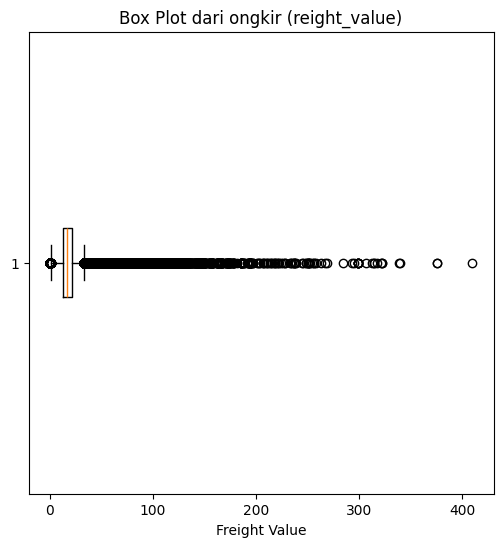

In [92]:
# visualisasi outliers dari reight_value
plt.figure(figsize=(6, 6))
plt.boxplot(df_order_items['freight_value'], vert=False)
plt.title('Box Plot dari ongkir (reight_value)')
plt.xlabel('Freight Value')
plt.show()

Outliers pada `freight_value` tidak akan kita hapus, dikarenakan ada kemungkinan relasi antara harga ongkir dengan jarak lokasi. yang akan kita explore pada tahap EDA

#### `df_order_payments`

##### Cek tipe data & data null

In [102]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Pada dataset `df_order_payments` **tidak** terdapat **data yang null**. untuk tipe data udah sesuai semua


##### Cek duplikat data

In [100]:
df_order_payments.duplicated().sum()

np.int64(0)

Tidak ada data yang terduplikasi pada `df_order_payments`

##### Cek unik data

In [112]:
df_order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [177]:
# data unik urutan pembayaran
df_order_payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [170]:
# data unik jumlah cicilan
df_order_payments['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [171]:
df_order_payments[df_order_payments['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


- terdapat urutan pembayaran sampai dengan 29 dengan urutan terendahnya yaitu 1
- pada kolom `payment_installments` terdapat 24 angka unik. tetapi terdapat nilai 0 pada kolom ini yang berjumlah 2 baris. akan kita 2 data tersebut dikarenakan jumlah cicilan dimulai dari angka 1 bukan 0

##### Cek Outliers

In [181]:
df_order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [178]:
# outliers payment_value
q1_pembayaran = df_order_payments['payment_value'].quantile(.25)
q3_pembayaran = df_order_payments['payment_value'].quantile(.75)
iqr_pembayaran = q3_pembayaran - q1_pembayaran

lower_bound_pembayaran = q1_pembayaran - 1.5 * iqr_pembayaran
upper_bound_pembayaran = q3_pembayaran + 1.5 * iqr_pembayaran

outliers_pembayaran = df_order_payments[
    (df_order_payments['payment_value'] < lower_bound_pembayaran) |
    (df_order_payments['payment_value'] > upper_bound_pembayaran)
]

print(len(outliers_pembayaran))

7981


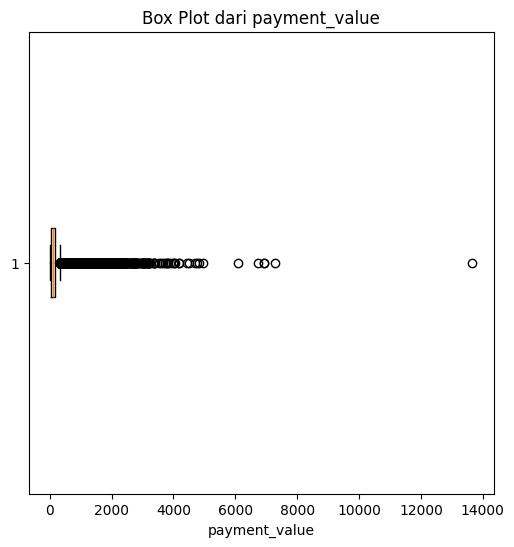

In [184]:
# visualisasi outliers dari lower_bound_pembayaran
plt.figure(figsize=(6, 6))
plt.boxplot(df_order_payments['payment_value'], vert=False)
plt.title('Box Plot dari payment_value')
plt.xlabel('payment_value')
plt.show()

Terdapat 7981 outliers pada kolom `payment_value` yang akan kita hapus semua pada tahap cleaning

#### `df_order_reviews`

##### Cek tipe data & data null

In [128]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
df_order_reviews.info()
# yg di gunakan datanya hanya review_id order_id review_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [140]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [133]:
df_order_reviews['review_comment_title'].isnull().sum()

np.int64(87656)

terdapat beberapa kolom yang null pada `review_comment_title` dan `review_comment_message` yang akan kita **hapus kolom** nya dikarenakan kita hanya memeprlukan `rating_id`, `review_id` dan `order_id` selain itu akan kita hapus pada tahap cleaning

##### Cek Duplikat Data

In [134]:
df_order_reviews.duplicated().sum()

np.int64(0)

Tida ada duplikasi data pada dataset ini

##### Cek data unik

In [135]:
df_order_reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

- Terdapat 5 score unik di mulai dari angka 1
- jumlah order_id > review_id menunjukan tidak semua pesanan diberikan ulasan

#### `df_orders`


##### Cek tipe data & data null

In [136]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [145]:
df_orders.info()
# order_purchase_timestamp	order_approved_at	order_delivered_carrier_date	order_delivered_customer_date	order_estimated_delivery_date
# harusnya datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [139]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- tipe data tidak sesuai pada kolom : (harus di ubah ke datetime)
  - `order_purchase_timestamp`, 
  - `order_approved_at`,
  - `order_delivered_carrier_date`
  - `order_delivered_customer_date`
  - `order_estimated_delivery_date`
- data yang null akan seluruhnya di hapus pada tahap cleaning nanti

##### Cek Duplikat Data

In [168]:
df_orders.duplicated().sum()

np.int64(0)

Tidak terdapat duplikasi data

##### Cek data unik

In [166]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [144]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

- terdapat 8 status unik dari 99441 order yang berbeda
- pada `order_estimated_delivery_date` hanya terdapat 459 tanggal yang unik, ini menandakan bahwa banyak pesanan yang memiliki estimasi datetime yang sama

#### `df_product_category`

##### Cek Tipe Data & Data Null

In [169]:
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [147]:
df_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tipe data sudah sesuai dan tidak terdapat data yang null

##### Cek Duplikat Data

In [148]:
df_product_category.duplicated().sum()

np.int64(0)

Tidak terdapat duplikasi data

##### Cek Data Unik

In [149]:
df_product_category.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

dari 71 data yang ada, semua nya unik / berbeda

#### `df_products`


##### Cek Tipe Data & Data Null

In [150]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [153]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- untuk tipe data berikut diubah ke integer saja :
  - `product_name_lenght`
  - `product_description_lenght`
  - `product_photos_qty`
- data yang null akan kita hapus pada tahap cleaning nanti

##### Cek Duplikat Data

In [155]:
df_products.duplicated().sum()

np.int64(0)

##### Cek Data Unik

In [156]:
df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [159]:
len(df_products['product_category_name'].unique())

74

#### `df_sellers`

##### Cek Tipe Data & Data Null

In [160]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [162]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### Cek Duplikat Data

In [163]:
df_sellers.duplicated().sum()

np.int64(0)

##### Cek Data Unik 

In [165]:
df_sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data

Setelah tahap assesing kita lanjut ke tahap cleaning data. berikut rangkuman dari tahap assesing

insight
- 1
- 2

## Exploratory Data Analysis (EDA)

### Explore ...

insight
- 1
- 2

## Visualization & Explanatory Analysis

### Pertanyaan 1

### Pertanyaan 2

insight
- 1
- 2

## Analisis Lanjutan

## Conclusion

- Conclusi p1
- Conclusi p2